# Email- spam classifier using Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("spambase.data", header = None)


In [3]:
data.shape

(4601, 58)

In [4]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [5]:
#Checking missing values
X.isnull().values.any()
y.isnull().values.any()

False

In [6]:
X = np.array(X)
y = np.array(y)


In [7]:
spam = y[y==0]
non_spam = y[y==1]

In [8]:
print("Number of spam email is", len(spam))
print("Number of non-spam email is", len(non_spam))
print("Number of features is ", X.shape[1])

Number of spam email is 2788
Number of non-spam email is 1813
Number of features is  57


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size =0.2)

In [12]:
tree = DecisionTreeClassifier()
params ={'max_depth': [3,4,5,6,7,8,9,10,11,12,13]}

In [13]:
tune = GridSearchCV(tree, params, cv =10, scoring ='roc_auc').fit(X_train, y_train)
print('Best parameters are: ', tune.best_params_)
print('Best score are: ', tune.best_score_)


Best parameters are:  {'max_depth': 5}
Best score are:  0.930369466532747


In [14]:
##Train and fit best tree model
best_tree = DecisionTreeClassifier(max_depth = 5)
best_tree.fit(X_train, y_train)
y_tree = best_tree.predict(X_test)

In [15]:
print("ROC_AUC of best tree model ", roc_auc_score(y_test, y_tree))

ROC_AUC of best tree model  0.8856149500217297


[Text(207.04736842105262, 199.32, 'X[52] <= 0.056\ngini = 0.474\nsamples = 3680\nvalue = [2257, 1423]'),
 Text(127.75263157894737, 163.07999999999998, 'X[6] <= 0.065\ngini = 0.35\nsamples = 2779\nvalue = [2150, 629]'),
 Text(70.48421052631579, 126.83999999999999, 'X[51] <= 0.251\ngini = 0.265\nsamples = 2523\nvalue = [2127, 396]'),
 Text(35.242105263157896, 90.6, 'X[15] <= 0.04\ngini = 0.155\nsamples = 2101\nvalue = [1923, 178]'),
 Text(17.621052631578948, 54.359999999999985, 'X[23] <= 0.02\ngini = 0.109\nsamples = 1882\nvalue = [1773, 109]'),
 Text(8.810526315789474, 18.119999999999976, 'gini = 0.096\nsamples = 1844\nvalue = [1751, 93]'),
 Text(26.431578947368422, 18.119999999999976, 'gini = 0.488\nsamples = 38\nvalue = [22, 16]'),
 Text(52.863157894736844, 54.359999999999985, 'X[24] <= 0.075\ngini = 0.432\nsamples = 219\nvalue = [150, 69]'),
 Text(44.05263157894737, 18.119999999999976, 'gini = 0.488\nsamples = 159\nvalue = [92, 67]'),
 Text(61.67368421052632, 18.119999999999976, 'gin

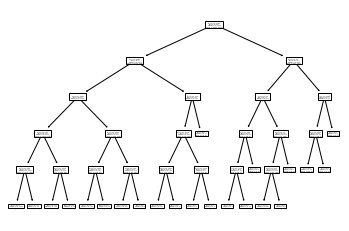

In [16]:
plot_tree(best_tree)

# Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier()

In [19]:
params = {'n_estimators':[1,2,4,6,8,10,20,30,40,50,60], 'max_depth' : [5,7,9,10,12,14]}
tune = GridSearchCV(rfc, params, cv =10, scoring ='roc_auc').fit(X_train, y_train)
print('Best parameters are: ', tune.best_params_)
print('Best score are: ', tune.best_score_)

Best parameters are:  {'max_depth': 14, 'n_estimators': 40}
Best score are:  0.9845715323979688


In [21]:
auc_score = []
for i in [1,2,4,6,8,10,20,30,40,50,60] :
    rfc= RandomForestClassifier(n_estimators = i)
    rfc.fit(X_train, y_train)
    y_rfc = rfc.predict(X_test)
    auc_score.append(roc_auc_score(y_test, y_rfc))

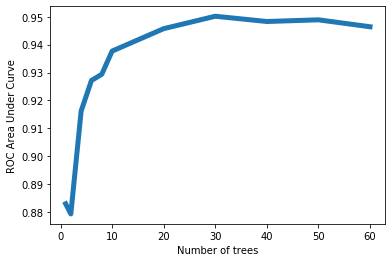

In [25]:
i = [1,2,4,6,8,10,20,30,40,50,60]
plt.plot(i, auc_score, linewidth =5)
plt.xlabel("Number of trees")
plt.ylabel('ROC Area Under Curve')
plt.show()

In [27]:
#Best random Forest model
best_rfc = RandomForestClassifier(n_estimators = 40, max_depth =14)
best_rfc.fit(X_train,y_train)
y_rfc = best_rfc.predict(X_test)
print("ROC area under the curve of Random Forest Classifer is", roc_auc_score(y_test, y_rfc))

ROC area under the curve of Random Forest Classifer is 0.9453715775749674


In [28]:
print("Based on ROC AUC scoring matrix, Random Forest Classifier outperformed Single Decision Tree Classifier in this Spam Email Classification task")

Based on ROC AUC scoring matrix, Random Forest Classifier outperformed Single Decision Tree Classifier in this Spam Email Classification task
